In [2]:
# 의사결정나무(Decision Tree)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [4]:
df = pd.read_csv('./day04_data/pasteurizer.csv')
df.head(20)

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
5,2020-03-04 8:30,1.0,1.0,585.0,536.0,OK
6,2020-03-04 9:00,1.0,1.0,585.0,537.0,OK
7,2020-03-04 9:30,1.0,1.0,585.0,538.0,OK
8,2020-03-04 10:00,1.0,1.0,585.0,541.0,OK
9,2020-03-04 10:30,1.0,1.0,585.0,543.0,OK


In [6]:
print(df.info())
# RangeIndex: 210794 개인데 반해 STATE Count 는 10000개 대인걸 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB
None


In [7]:
df['INSP'].unique()

array(['OK', 'NG'], dtype=object)

In [8]:
df['INSP'].value_counts()

OK    133010
NG     77784
Name: INSP, dtype: int64

In [9]:
df.isna().sum()

STD_DT                     0
MIXA_PASTEUR_STATE    199659
MIXB_PASTEUR_STATE    200539
MIXA_PASTEUR_TEMP       9371
MIXB_PASTEUR_TEMP      11992
INSP                       0
dtype: int64

In [14]:
df = df.dropna()
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
209206,2020-11-10 16:01,5603841.0,65536.0,607.0,39714816.0,NG
209228,2020-11-10 16:23,5603841.0,65536.0,566.0,37027840.0,OK
209229,2020-11-10 16:24,5603841.0,65536.0,567.0,37093376.0,OK
209231,2020-11-10 16:26,5603841.0,65536.0,572.0,37486592.0,OK


In [15]:
df.isna().sum()

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

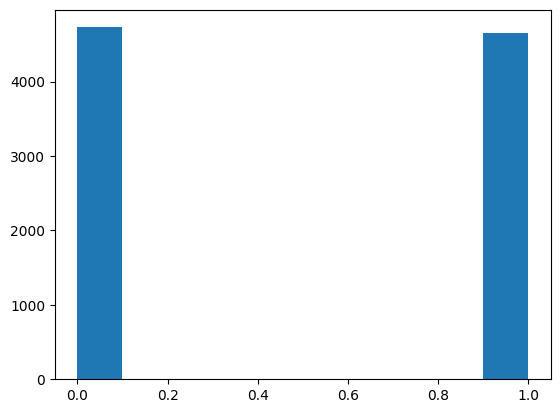

In [19]:
plt.hist(df['MIXA_PASTEUR_STATE'])

In [16]:
df['MIXA_PASTEUR_STATE'].unique()

array([1.000000e+00, 5.603841e+06, 0.000000e+00])

In [17]:
df = df[df.MIXA_PASTEUR_STATE < 2]
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
160703,2020-09-15 15:00,1.0,1.0,560.0,580.0,OK
160734,2020-09-15 15:30,1.0,1.0,588.0,555.0,OK
160765,2020-09-15 16:00,1.0,1.0,588.0,550.0,OK
160796,2020-09-15 16:30,1.0,1.0,595.0,555.0,OK


(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

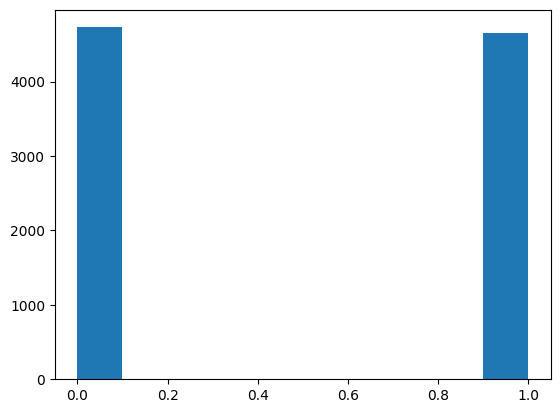

In [18]:
plt.hist(df['MIXB_PASTEUR_STATE'])

(array([   7.,    0.,    0., 2720.,  158.,  241., 1688., 4304.,  238.,
          27.]),
 array([  0. ,  77.2, 154.4, 231.6, 308.8, 386. , 463.2, 540.4, 617.6,
        694.8, 772. ]),
 <BarContainer object of 10 artists>)

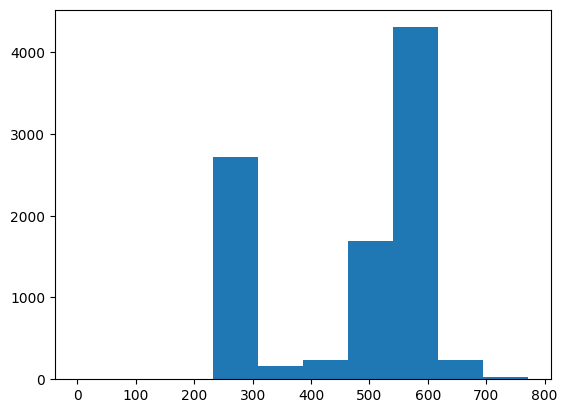

In [20]:
plt.hist(df['MIXA_PASTEUR_TEMP'])

(array([   7.,    0.,    0., 1749., 1423.,   10., 1487., 4418.,  250.,
          39.]),
 array([  0. ,  76.5, 153. , 229.5, 306. , 382.5, 459. , 535.5, 612. ,
        688.5, 765. ]),
 <BarContainer object of 10 artists>)

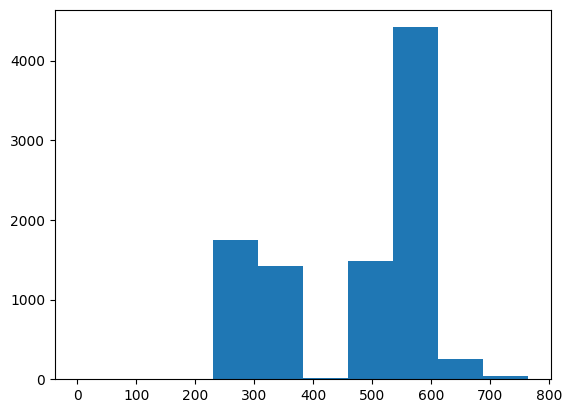

In [21]:
plt.hist(df['MIXB_PASTEUR_TEMP'])

In [22]:
df.corr()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
MIXA_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXB_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXA_PASTEUR_TEMP,0.523328,0.523328,1.000000,0.920102
MIXB_PASTEUR_TEMP,0.465706,0.465706,0.920102,1.000000


In [23]:
y = df.iloc[:, -1].values
y = np.where(y=='OK', 1, 0)     # y 가 OK 이면 1, 아니면 0
y

array([1, 1, 1, ..., 1, 1, 1])

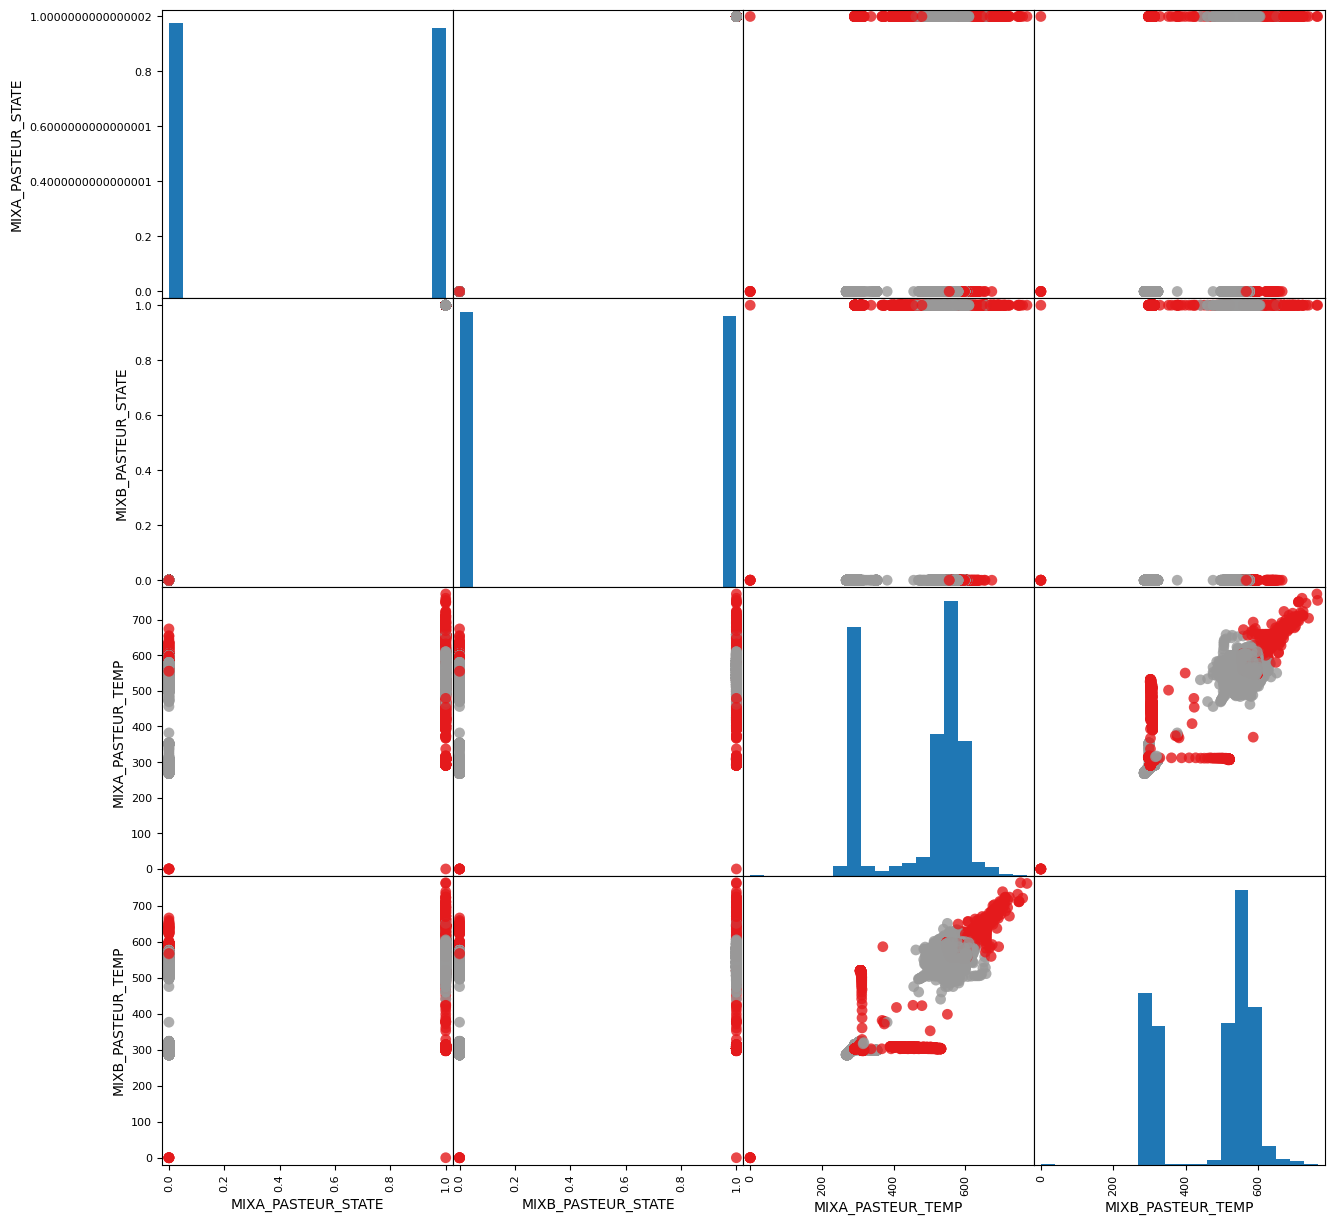

In [25]:
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=plt.cm.Set1)
plt.show()

In [27]:
x = df.iloc[:, 1:5]
x

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
0,1.0,1.0,551.0,524.0
1,1.0,1.0,584.0,536.0
2,1.0,1.0,584.0,536.0
3,1.0,1.0,585.0,536.0
4,1.0,1.0,585.0,536.0
...,...,...,...,...
160703,1.0,1.0,560.0,580.0
160734,1.0,1.0,588.0,555.0
160765,1.0,1.0,588.0,550.0
160796,1.0,1.0,595.0,555.0


In [28]:
print(x.shape, y.shape)

(9383, 4) (9383,)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6568, 4) (6568,)
(2815, 4) (2815,)


In [30]:
dt_clf = DecisionTreeClassifier(max_depth=3)
df_clf = dt_clf.fit(X_train, Y_train)

In [31]:
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
confusion = confusion_matrix(Y_test, dt_prediction)
confusion

array([[ 237,  196],
       [   1, 2381]])

In [33]:
acc = accuracy_score(Y_test, dt_prediction)
acc

0.9300177619893428

In [35]:
pre = precision_score(Y_test, dt_prediction)
pre

0.923942568878541

In [37]:
recall = recall_score(Y_test, dt_prediction)
recall

0.9995801847187238

In [38]:
f1 = f1_score(Y_test, dt_prediction)
f1

0.9602742488404921

[Text(0.5909090909090909, 0.875, 'MIXB_PASTEUR_TEMP <= 619.5\ngini = 0.254\nsamples = 6568\nvalue = [982, 5586]\nclass = 1'),
 Text(0.36363636363636365, 0.625, 'MIXB_PASTEUR_TEMP <= 310.5\ngini = 0.221\nsamples = 6383\nvalue = [807, 5576]\nclass = 1'),
 Text(0.18181818181818182, 0.375, 'MIXA_PASTEUR_STATE <= 0.5\ngini = 0.356\nsamples = 1444\nvalue = [335, 1109]\nclass = 1'),
 Text(0.09090909090909091, 0.125, 'gini = 0.009\nsamples = 1114\nvalue = [5, 1109]\nclass = 1'),
 Text(0.2727272727272727, 0.125, 'gini = 0.0\nsamples = 330\nvalue = [330, 0]\nclass = 0'),
 Text(0.5454545454545454, 0.375, 'MIXB_PASTEUR_TEMP <= 555.5\ngini = 0.173\nsamples = 4939\nvalue = [472, 4467]\nclass = 1'),
 Text(0.45454545454545453, 0.125, 'gini = 0.081\nsamples = 2716\nvalue = [115, 2601]\nclass = 1'),
 Text(0.6363636363636364, 0.125, 'gini = 0.27\nsamples = 2223\nvalue = [357, 1866]\nclass = 1'),
 Text(0.8181818181818182, 0.625, 'MIXA_PASTEUR_TEMP <= 579.5\ngini = 0.102\nsamples = 185\nvalue = [175, 10]\n

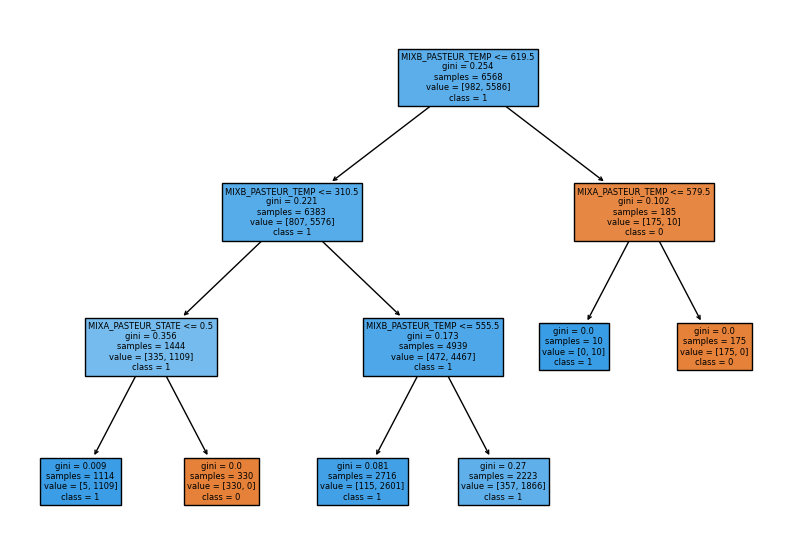

In [39]:
feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_names = np.array(['0','1'])

plt.figure(figsize=(10,7))
plot_tree(dt_clf, filled=True, feature_names=feature_names, class_names=target_names)